In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_dir = './data/'
f_app = os.path.join(data_dir,'application_train.csv')
print('path of read in data : %s ' %(f_app))
df = pd.read_csv(f_app)

path of read in data : ./data/application_train.csv 


In [80]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
sub_train = df.AMT_ANNUITY
sub_train.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [82]:
print('NA count in AMT ANNUITY: %d ' %(np.sum(sub_train.isnull())))

NA count in AMT ANNUITY: 12 


In [83]:
# Ignore NA, 計算五值 -> calculate the value of these percent in AMT ANNUITY
five_num = [0,25,50,75,100]
quantile_5s = [np.percentile(sub_train[~sub_train.isnull()], q=i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


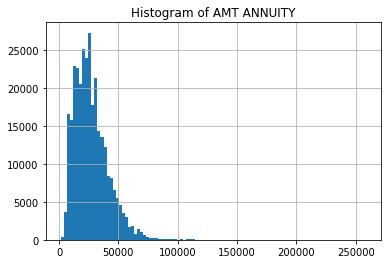

In [84]:
sub_train[~sub_train.isnull()].hist(bins = 100)
plt.title('Histogram of AMT ANNUITY')
plt.show()

In [85]:
sub_train.replace(to_replace = sub_train.max(), value = np.percentile(sub_train[~sub_train.isnull()], q = 99),inplace = True)
quantile_5s = [np.percentile(sub_train[~sub_train.isnull()], q=i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 230161.5]


In [86]:
print('Median of AMT ANNUITY: %f' %(np.median(sub_train[~sub_train.isnull()])))

Median of AMT ANNUITY: 24903.000000


In [87]:
from scipy.stats import mode
import time

start_time = time.time()
mode_get = mode(sub_train[~sub_train.isnull()])
print('Elapsed time: %.3f secs' %(time.time()-start_time))
print('Mode of AMT ANNUITY: ', mode_get )

Elapsed time: 0.031 secs
Mode of AMT ANNUITY:  ModeResult(mode=array([9000.]), count=array([6385]))


In [88]:
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for val in sub_train[~sub_train.isnull()]:
    mode_dict[val] += 1
mode_get = sorted(mode_dict.items(),key = lambda kv:kv[1],reverse = True)
print('Mode of AMT ANNUITY', mode_get[0])
print('Elapsed time: %.3f secs' %(time.time()-start_time))

Mode of AMT ANNUITY (9000.0, 6385)
Elapsed time: 0.120 secs


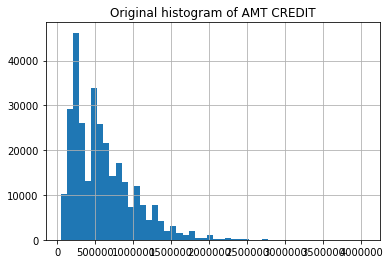

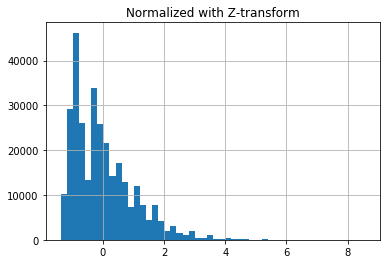

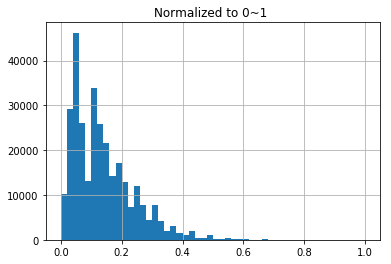

In [89]:
sub_train2 = df.AMT_CREDIT
sub_train2.hist(bins = 50)
plt.title('Original histogram of AMT CREDIT')
plt.show()

vals = sub_train2.values
df['AMT_CREDIT_Norm1'] = (vals - np.mean(vals)) / (np.std(vals))
df['AMT_CREDIT_Norm1'].hist(bins = 50)
plt.title('Normalized with Z-transform')
plt.show()

df['AMT_CREDIT_Norm2'] = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))
df['AMT_CREDIT_Norm2'].hist(bins = 50)
plt.title('Normalized to 0~1 ')
plt.show()

It's your turn <br />
1. 列出 AMT_ANNUITY 的 q0 - q100 <br />
2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補 <br />
2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間 <br />
3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補 <br />

In [90]:
# AMT ANNUITY q0 - q100
qs = np.arange(0,101,1)
quantile_100s = [np.percentile(sub_train[~sub_train.isnull()],q = i) for i in qs]
print(quantile_100s)

[1615.5, 6182.910000000001, 6750.0, 7875.0, 8703.0, 9000.0, 9000.0, 9553.5, 10125.0, 10503.0, 11074.5, 11430.0, 11970.0, 12375.0, 12838.5, 13302.0, 13500.0, 13500.0, 13896.0, 14350.5, 14701.5, 15124.5, 15583.5, 15970.5, 16209.0, 16524.0, 16852.5, 17109.0, 17487.0, 17806.5, 18189.0, 18643.5, 19102.5, 19417.5, 19836.0, 20151.0, 20421.0, 20853.0, 21186.0, 21609.0, 21865.5, 22018.5, 22342.5, 22527.0, 22972.5, 23346.0, 23719.5, 23931.0, 24259.5, 24583.589999999953, 24903.0, 25240.5, 25537.5, 25960.5, 26217.0, 26316.0, 26640.0, 26860.5, 27189.0, 27558.0, 28062.0, 28480.5, 28917.0, 29340.0, 29830.5, 30078.0, 30483.0, 30897.0, 31275.0, 31630.5, 32004.0, 32458.5, 32895.0, 33376.5, 33984.0, 34596.0, 35345.16000000005, 35806.5, 36328.5, 36747.0, 37516.5, 37948.5, 38556.0, 39456.0, 40135.5, 40806.0, 41845.5, 42790.5, 43735.5, 44991.0, 45954.0, 47254.5, 48465.0, 49878.0, 51745.5, 53325.0, 55624.5, 58482.0, 62964.0, 70006.5, 230161.5]


In [91]:
# fill AMT ANNUITY NAs with median value
Median = np.median(sub_train[~sub_train.isnull()])
sub_train = sub_train.fillna(Median)
print('NA count in AMT ANNUITY: %d' %(np.sum(sub_train.isnull())))

NA count in AMT ANNUITY: 0


count    307511.000000
mean         -0.776917
std           0.126781
min          -1.000000
25%          -0.869536
50%          -0.796212
75%          -0.711389
max           1.000000
dtype: float64


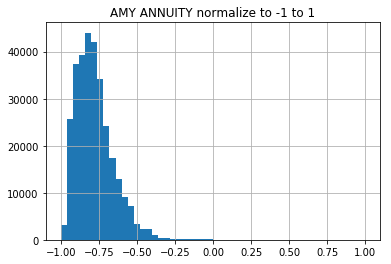

In [113]:
#Normalize AMT ANNUITY values to -1 ~ 1
vals = sub_train.values
vals = (vals-np.min(vals))/(np.max(vals)-np.min(vals))
vals = (vals-0.5)*2
sub_train = pd.Series(vals)
print(sub_train.describe())
sub_train.hist(bins = 50)
plt.title('AMY ANNUITY normalize to -1 to 1')
plt.show()

In [111]:
# Fill NAs of AMT GOOD PRICE with mode
mode_get = mode(df[~df.AMT_GOODS_PRICE.isnull()]['AMT_GOODS_PRICE'])
mode_dict = defaultdict(lambda:0)
for val in df[~df.AMT_GOODS_PRICE.isnull()]['AMT_GOODS_PRICE']:
    mode_dict[val] += 1
mode_dict = sorted(mode_dict.items(),key = lambda v: v[1], reverse = True)
mode_get = mode_dict[0]

print('NA count before fillna: %d ' %(np.sum(df.AMT_GOODS_PRICE.isnull())))
df.AMT_GOODS_PRICE = df.AMT_GOODS_PRICE.fillna(mode_get[0])
print('NA count after fiilna: %d' %(np.sum(df.AMT_GOODS_PRICE.isnull())))


NA count before fillna: 278 
NA count after fiilna: 0
